In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Turbulent boundary layers

All boundary layers start as __laminar flow__ and transitions to [__turbulence__](https://arstechnica.com/science/2018/10/turbulence-the-oldest-unsolved-problem-in-physics/) along the length of a body if the Reynolds number is sufficiently large. Laminar and turbulent boundary layers are qualitatively different, with very different measured properties: 
 - A laminar flow is characterized by smooth orderly fluid motion, without any mixing between layers (or _lamina_ ) of fluid and gradual changes along the length of the BL. 
 - A turbulent flow is characterized by with elements of the fluid moving somewhat randomly throughout the boundary layer region.

Check out this fun 3Blue1Brown [video on turbulence](https://www.youtube.com/watch?v=_UoTTq651dE) (which uses some of my simulations at [9:18](https://youtu.be/_UoTTq651dE?t=558)). [This Veritasium video](https://youtu.be/5zI9sG3pjVU) is also very fun.

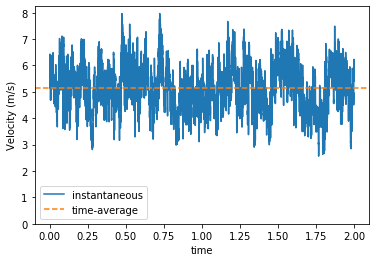

In [2]:
probe = np.load('probe.npy')
N,f=len(probe),1/2e4
t = np.arange(0,N*f,f)
plt.plot(t,probe,label='instantaneous')
plt.axhline(np.mean(probe),c='C1',ls='--',label='time-average')
plt.xlabel('time'); plt.ylabel('Velocity (m/s)'); plt.ylim(0,)
plt.legend();

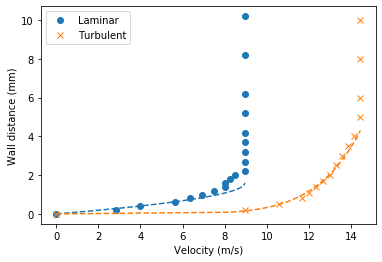

In [3]:
laminar = pd.read_csv("laminar_profile.csv")
turbulent = pd.read_csv("turbulent_profile.csv")
y,u = laminar.columns # column names

plt.plot(laminar[u],laminar[y],'o',label='Laminar')
plt.plot(turbulent[u],turbulent[y],'x',label='Turbulent')

# Laminar fit
delta = 1.6 # estimate
eta = np.linspace(0,1)
plt.plot(laminar[u].max()*(2*eta-eta**2),eta*delta,'C0--')

# Turbulent fit
delta,n = 4.3,7 # estimate
plt.plot(turbulent[u].max()*eta**(1/n),eta*delta,'C1--')

plt.xlabel(u); plt.ylabel(y);plt.legend()
plt.show()

In [4]:
s = "Re_x={:.2g}, del={:.2g}m, del_2={:.2g}m, D={:.2g}N"
def lam(U,x=0.14,nu=1e-5,rho=1):
    Re_x = U*x/nu
    delta = 5.5*x/np.sqrt(Re_x) # Karman
    delta_2 = .664*x/np.sqrt(Re_x) # Blasius
    print(s.format(Re_x,delta,delta_2,rho*U**2*delta_2))

def turb(U,x=0.14,nu=1e-5,rho=1):
    Re_x = U*x/nu
    delta = .16*x*Re_x**(-1/7) # power law
    delta_2 = 7/72*delta    # power law
    print(s.format(Re_x,delta,delta_2,rho*U**2*delta_2))

lam(U=9)
lam(U=14.5)
turb(U=14.5)

Re_x=1.3e+05, del=0.0022m, del_2=0.00026m, D=0.021N
Re_x=2e+05, del=0.0017m, del_2=0.00021m, D=0.043N
Re_x=2e+05, del=0.0039m, del_2=0.00038m, D=0.08N


In [5]:
lam(U=1,x=1,nu=1e-6,rho=1e3)
turb(U=1,x=1,nu=1e-6,rho=1e3)

Re_x=1e+06, del=0.0055m, del_2=0.00066m, D=0.66N
Re_x=1e+06, del=0.022m, del_2=0.0022m, D=2.2N


Here is a plot of the total friction drag coefficient $C_F$ versus $Re_L$. I've also included the implicit Shoenherr equation which you may have seen in Ship R&P.

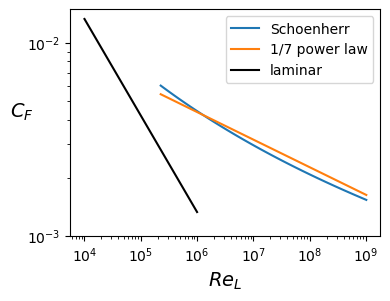

In [7]:
def Shoenherr(C_F): 
    return np.exp(1/1.79/np.sqrt(C_F))/C_F

plt.figure(figsize=(4,3),dpi=100)
CF_log = np.linspace(1.535e-3,6e-3)
Re_L = Shoenherr(CF_log)
plt.loglog(Re_L,CF_log,label='Schoenherr')
plt.loglog(Re_L,7/6*0.027*Re_L**(-1/7),label='1/7 power law')
Re_lam = np.linspace(1e4,1e6)
plt.loglog(Re_lam,2*0.664/np.sqrt(Re_lam),'k',label='laminar')
plt.ylim(1e-3,)
plt.xlabel('$Re_L$',size=14)
plt.ylabel('$C_F$',rotation=0,size=14)
plt.legend()
plt.show()

For the boundary layer growth, I've changed it to show scaled $\delta$ vs the scaled distance $x$, changing $Re_L$ from laminar to turbulent.

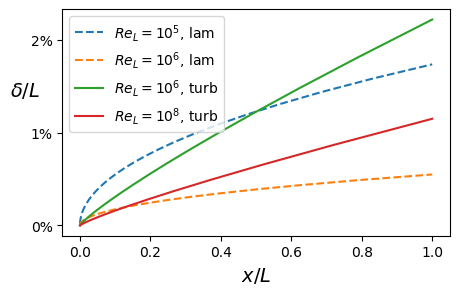

In [8]:
plt.figure(figsize=(5,3),dpi=100)
for i in [5,6]:
    Re_x = np.logspace(1,i)
    plt.plot(Re_x/max(Re_x),5.5*np.sqrt(Re_x)/max(Re_x),
             label='$Re_L=10^{:n}$, lam'.format(i),ls='--')
for i in [6,8]:
    Re_x = np.logspace(1,i)
    plt.plot(Re_x/max(Re_x),0.16*Re_x**(6/7)/max(Re_x),
             label='$Re_L=10^{:n}$, turb'.format(i))

vals = [0,0.01,0.02]
plt.yticks(vals,['{:,.0%}'.format(x) for x in vals])

plt.xlabel('$x/L$',size=14)
plt.ylabel(r'$\delta/L$',y=.6,rotation=0,size=14)
plt.legend()
plt.show()

All of these plots show the huge difference tripping the boundary layer near $Re_L\approx 10^6$ makes.